/tmp/ipykernel_51766/3652601010.py:25: RuntimeWarning: invalid value encountered in divide
  S = 1 - (3 * numerator / denominator)
/tmp/ipykernel_51766/3652601010.py:31: RuntimeWarning: invalid value encountered in divide
  theta = np.arccos(numerator / denominator)
/tmp/ipykernel_51766/3652601010.py:40: RuntimeWarning: invalid value encountered in cast
  hsi_img = Image.fromarray((hsi_img_array * 255).astype(np.uint8))


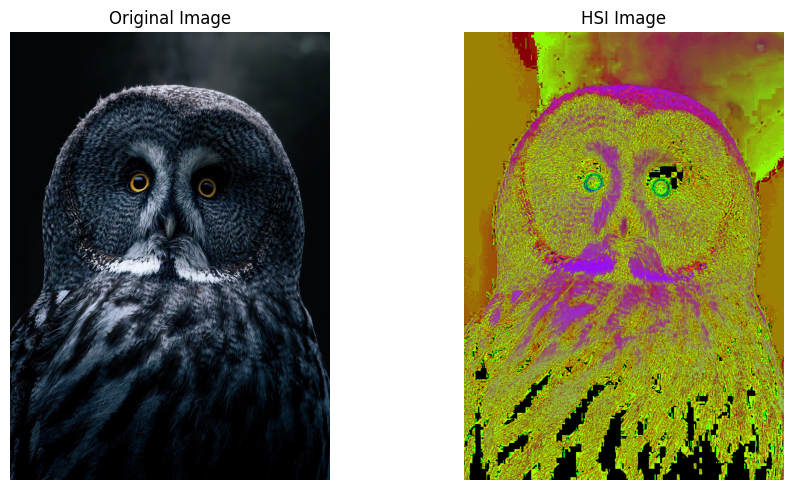

HSI image saved as hsi_image.jpg


In [1]:
# rgb_to_hsi.py

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def rgb_to_hsi(input_path, output_path):
    img = Image.open(input_path)  # Open the image
    img_array = np.array(img)

    # Normalize RGB values to [0, 1]
    img_array = img_array / 255.0
    
    # Extract R, G, B channels
    R = img_array[:,:,0]
    G = img_array[:,:,1]
    B = img_array[:,:,2]

    # Calculate intensity (I)
    I = (R + G + B) / 3

    # Calculate saturation (S)
    numerator = 2 * (np.minimum(np.minimum(R, G), B))
    denominator = R + G + B
    S = 1 - (3 * numerator / denominator)
    S[denominator == 0] = 0  # Handle division by zero

    # Calculate hue (H)
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G) ** 2 + (R - B) * (G - B))
    theta = np.arccos(numerator / denominator)
    H = theta
    H[B > G] = 2 * np.pi - H[B > G]
    H = H / (2 * np.pi)  # Normalize to [0, 1]

    # Stack H, S, I to create HSI image
    hsi_img_array = np.stack([H, S, I], axis=-1)

    # Convert the HSI array to an image (in [0, 255] scale for each component)
    hsi_img = Image.fromarray((hsi_img_array * 255).astype(np.uint8))

    # Save the output image
    hsi_img.save(output_path)

    # Display original and HSI images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(hsi_img)
    plt.title("HSI Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    input_path = "input.jpg"          
    output_path = "hsi_image.jpg"  
    rgb_to_hsi(input_path, output_path)
    print(f"HSI image saved as {output_path}")
